*Exploratory Data Analysis on a Public Dataset*

In [2]:
pip install pandas matplotlib seaborn numpy


Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install Flask joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the Data
df = pd.read_csv("train.csv")

In [5]:
#Data overview
# First few rows
print(df.head())

# Info about dataset (columns, data types, missing values)
print(df.info())

# Basic statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
#Handling missing values
# Check missing values
print(df.isnull().sum())

# Drop rows with missing 'Age' or 'Embarked'
df.dropna(subset=['Age', 'Embarked'], inplace=True)

# Fill missing 'Age' with median
df.fillna({'Age': df['Age'].median()}, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


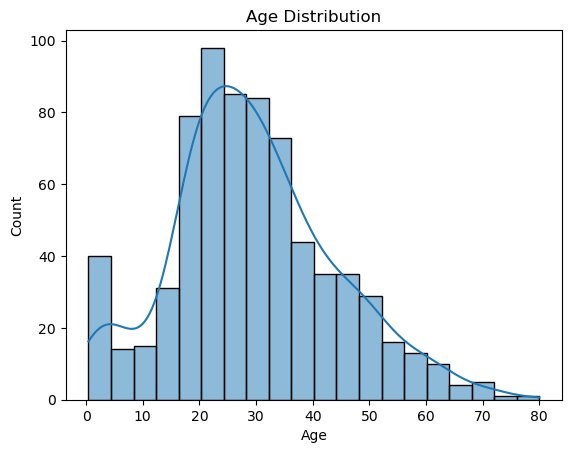

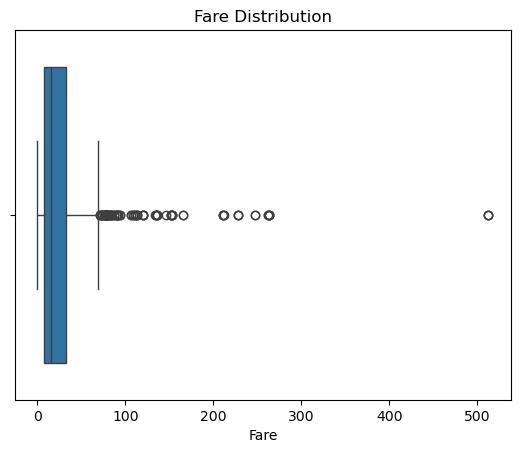

In [7]:
#Visualizing Distributions
# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()


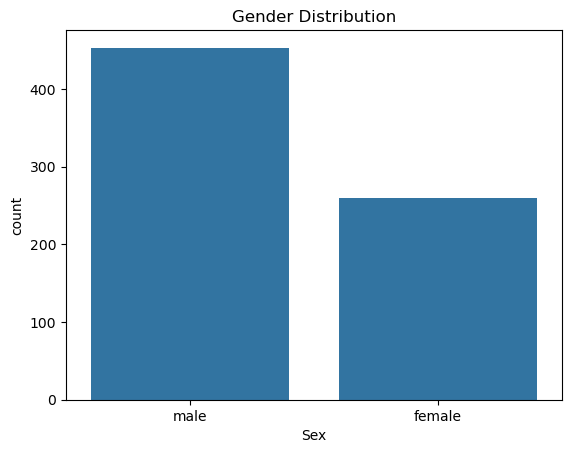

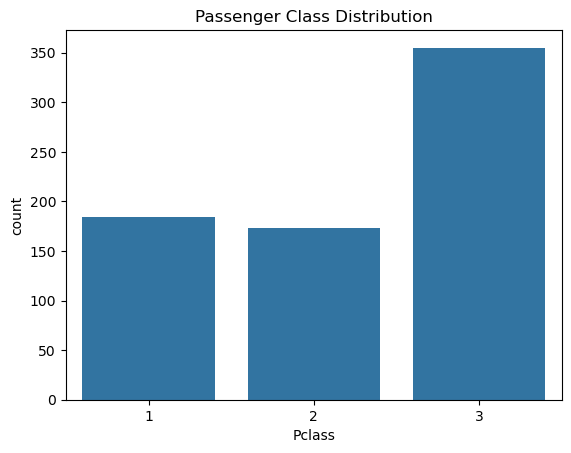

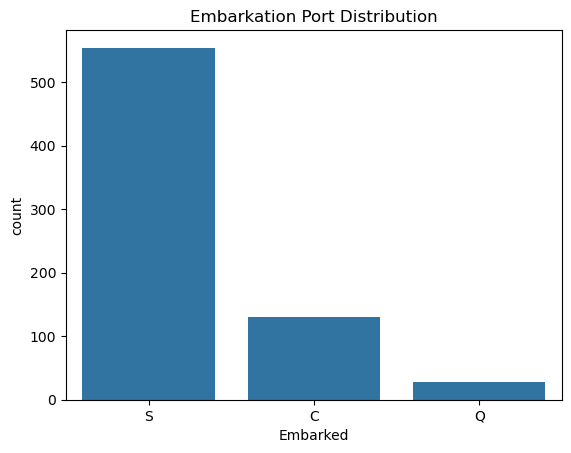

In [8]:
#Categorical Data Analysis
# Count plot for 'Sex'
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

# Count plot for 'Pclass'
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Count plot for 'Embarked'
sns.countplot(x='Embarked', data=df)
plt.title('Embarkation Port Distribution')
plt.show()


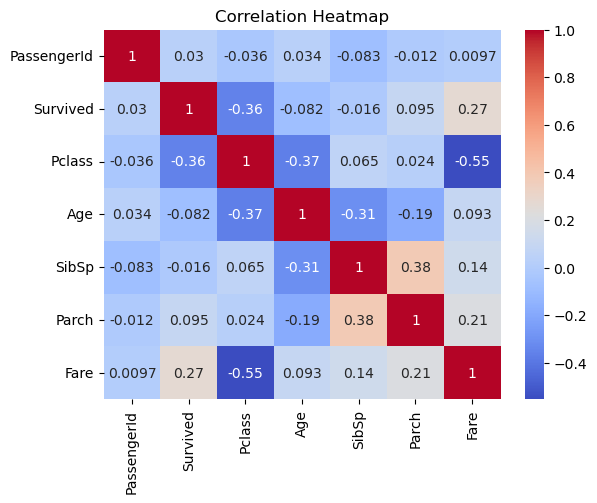

In [9]:
#Correlations & Heatmap
# Correlation matrix for numeric columns only
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

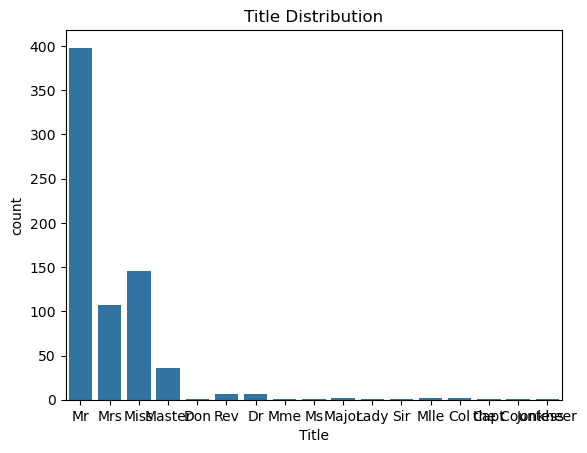

In [10]:
#Feature Engineering
# Extract title from Name column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
sns.countplot(x='Title', data=df)
plt.title('Title Distribution')
plt.show()

In [11]:
#Handle Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [31]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [33]:
#Split Data into Features and Target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Feature variables
y = df['Survived']  # Target variable

In [35]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
#Train Classification Models
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)


In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)


In [41]:
#Accuracy Score
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6993


In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[62 18]
 [25 38]]


In [45]:
#Classification Report
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.78      0.74        80
           1       0.68      0.60      0.64        63

    accuracy                           0.70       143
   macro avg       0.70      0.69      0.69       143
weighted avg       0.70      0.70      0.70       143



In [47]:
#Cross-validation 
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.76223776 0.81818182 0.78169014 0.77464789 0.80985915]
Mean CV score: 0.7893233527036344


In [49]:
#Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best model
best_logreg = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_logreg.predict(X_test)

# Evaluate the best model
print(f"Best model accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Best hyperparameters: {'C': 10, 'solver': 'lbfgs'}
Best model accuracy: 0.7972


In [51]:
#Using Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'C': uniform(0.001, 10),
    'solver': ['lbfgs', 'liblinear']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Get the best model
best_logreg_random = random_search.best_estimator_

# Predict with the best model
y_pred_best_random = best_logreg_random.predict(X_test)

# Evaluate the best model
print(f"Best model accuracy (Random Search): {accuracy_score(y_test, y_pred_best_random):.4f}")


Best hyperparameters: {'C': 3.338086111390218, 'solver': 'liblinear'}
Best model accuracy (Random Search): 0.7902


In [53]:
#Hyperparameter Tuning for Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Print best hyperparameters
print(f"Best hyperparameters for Decision Tree: {grid_search_dt.best_params_}")

# Get the best model
best_dt = grid_search_dt.best_estimator_

# Predict with the best model
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the best model
print(f"Best Decision Tree model accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree model accuracy: 0.7552


In [55]:
#Using Cross-Validation for Model Evaluation
#Cross-Validation with Logistic Regression
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores for Logistic Regression: {logreg_cv_scores}")
print(f"Mean CV score: {logreg_cv_scores.mean():.4f}")


Cross-validation scores for Logistic Regression: [0.76223776 0.81818182 0.78169014 0.77464789 0.80985915]
Mean CV score: 0.7893


In [57]:
#Cross-Validation with Decision Tree
# Perform 5-fold cross-validation
dt_cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores for Decision Tree: {dt_cv_scores}")
print(f"Mean CV score: {dt_cv_scores.mean():.4f}")


Cross-validation scores for Decision Tree: [0.6993007  0.7972028  0.78169014 0.73239437 0.78873239]
Mean CV score: 0.7599


In [59]:
#Hyperparameter Tuning (Improve Logistic Regressionâ€™s performance by tuning parameters)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'solver': ['liblinear', 'lbfgs'] # Solvers
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model
best_log_reg = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'solver': 'lbfgs'}


In [63]:
# Final Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7972027972027972
Confusion Matrix:
 [[73  7]
 [22 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [65]:
#Save the Final Model
import joblib
joblib.dump(best_log_reg, 'logistic_model.pkl')


['logistic_model.pkl']

In [71]:
#Install Flask and joblib

#pip install Flask joblib
